<a href="https://colab.research.google.com/github/metalearning-inisiatif/Struktur-Superlearning/blob/SOLUSI-ODE-DENGAN-RK4/SolvingODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ini adalah coding yang diambil dari buku solving ODE.
Penekanan disini diletakan pada aspek OOP dari masalah yang mau diselesaikan.
Perhatikan konsep inheritance, class, object modules dll.

In [ ]:
%cd drive/MyDrive/Penelitian/DIKTI 2022/Superlearning/Dynamic System

/content/drive/MyDrive/Penelitian/DIKTI 2022/Superlearning/Dynamic System


In [ ]:
!pwd

/content/drive/MyDrive/Penelitian/DIKTI 2022/Superlearning/Dynamic System


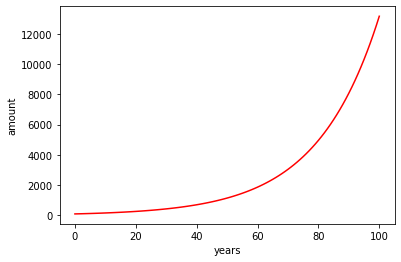

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x0 = 100 # initial amount
p = 5 # interest rate
N = 100 # number of years
x = np.zeros(N+1)
x[0] = x0
for n in range(1,N+1):
  x[n] = x[n-1] + (p/100.0)*x[n-1]
plt.plot(x, "r-")
plt.xlabel("years")
plt.ylabel("amount")
plt.show()

In [ ]:
x = x0 #x is here a single number, not array
index_set = range(100)
for n in index_set[1:]:
  x = x + (p/100.)*x
print("Final amount: ", x)

Final amount:  12523.929318695562


In [ ]:
import datetime
date1 = datetime.date(2017,9,29) # Sep 29, 2017
date2 = datetime.date(2018, 8, 4) # Aug 4, 2018
diff = date2 - date1
print(diff.days)

309


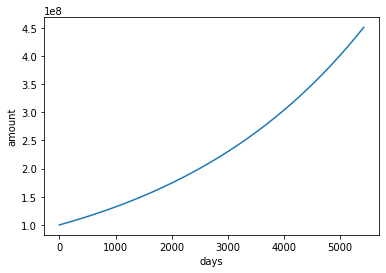

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#import datetime
x0 = 100000000 # initial amount
p = 10 # annual interest rate
r = p/360.0 # daily interest rate
date1 = datetime.date(2010, 9, 29)
date2 = datetime.date(2025, 8, 4)
diff = date2 - date1
N = diff.days
index_set = range(N+1)
x = np.zeros(len(index_set))
x[0] = x0
for n in index_set[1:]:
  x[n] = x[n-1] + (r/100.0)*x[n-1]
plt.plot(index_set, x)
plt.xlabel("days")
plt.ylabel("amount")
plt.show()

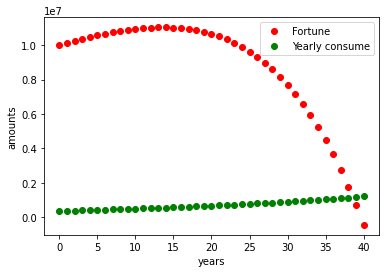

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
F = 1e7 # initial amount
p = 5 # interest rate
I = 3
q = 75
N = 40 # number of years
index_set = range(N+1)
x = np.zeros(len(index_set))
c = np.zeros_like(x)
x[0] = F
c[0] = q*p*F*1e-4
for n in index_set[1:]:
  x[n] = x[n-1] + (p/100.0)*x[n-1] - c[n-1]
  c[n] = c[n-1] + (I/100.0)*c[n-1]
plt.plot(index_set, x, 'ro',label = 'Fortune')
plt.plot(index_set, c, 'go', label = 'Yearly consume')
plt.xlabel('years')
plt.ylabel('amounts')
plt.legend()
plt.show()

In [ ]:
#import numpy as np
x = 0.5 #approximate exp(x) for x = 0.5
N = 5
index_set = range(N+1)
a = np.zeros(len(index_set))
e = np.zeros(len(index_set))
a[0] = 1
print(f'Exact: exp({x}) = {np.exp(x)}')
for n in index_set[1:]:
  e[n] = e[n-1] + a[n-1]
  a[n] = x/n*a[n-1]
  print(f'n = {n}, approx. {e[n]:2.2f}, error nya adalah = {np.abs(e[n]-np.exp(x)):4.3f}')

Exact: exp(0.5) = 1.6487212707001282
n = 1, approx. 1.00, error nya adalah = 0.649
n = 2, approx. 1.50, error nya adalah = 0.149
n = 3, approx. 1.62, error nya adalah = 0.024
n = 4, approx. 1.65, error nya adalah = 0.003
n = 5, approx. 1.65, error nya adalah = 0.000


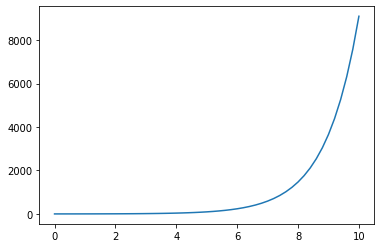

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
dt = 0.2
U0 = 1
T = 10
N = int(T/dt)
t = np.zeros(N+1)
u = np.zeros(N+1)
t[0] = 0
u[0] = U0
for n in range(N):
  t[n+1] = t[n] + dt
  u[n+1] = (1 + dt)*u[n]
plt.plot(t,u)
plt.show()

$u(t_{n+1}) = u(t_{n}) + ∆tf(u(t_{n}), t_{n})$.

This is known as the Forward Euler (FE) method, and is the simplest numerical method for solving and ODE. We can simplify the formula by using the notation for difference equations. If we let $u_{n}$ denote the numerical approximation to the exact solution u(t) at $t = t_{n}$, the difference equation can be written as
$u_{(n+1)} = u_{n} + ∆tf(u_{n}, t_{n})$.

##Extending the solver to a general ODE.##

As stated above, the purpose of this chapter is to create general-purpose ODE solvers, that can solve any ODE written on the form $u' = f (u, t)$. This requires a very small modification of the algorithm above;
1.	Create arrays $t$ and $u$ of length $N+1$
2.	Set initial condition: $u[0]= u_{0}, t[0]=0$
3. For $n = 0, 1, 2,..., N − 1: \\
   u[n+1] = u[n] + dt*f(u[n],t[n]) \\
   t[n+1] = t[n] + dt$
   
The only change of the algorithm is in the formula for computing $u[n+1]$ from $u[n]$. In the previous case we had $f(u,t)=u$, and to create a general-purpose ODE solver we simply replace $u[n]$ with the more general $f(u[n],t[n])$. The following Python function implements this generic version of the FE method:



In [ ]:
def ForwardEuler(f, U0, T, N):
  """Solve u’=f(u,t), u(0)=U0, with n steps until t=T."""
  import numpy as np
  t = np.zeros(N+1)
  u = np.zeros(N+1) # u[n] is the solution at time t[n]
  u[0] = U0
  t[0] = 0
  dt = T/N
  for n in range(N):
    t[n+1] = t[n] + dt
    u[n+1] = u[n] + dt*f(u[n], t[n])
  return u, t

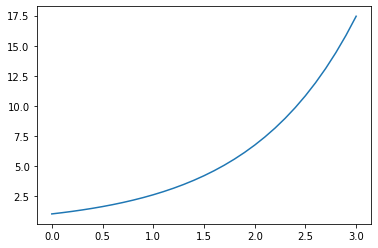

In [ ]:
def f(u,t):
  return u
U0 = 1
T = 3
N = 30

#f adalah fungsi yang menjadi salah satu input dari method ForwardEuler.
# Implementasi f di dalam method di atas harus konsisten dengan definisi fungsinya.
# Input lain untuk method ForwardEuler berupa konstant.

u, t = ForwardEuler(f, U0, T, N)
plt.plot(t,u)
plt.show()

###The ODE solver implemented as a class###

Let us look at how a solver class can be implemented:
  
* We need a constructor (__init__ ) which takes f, T, N, and U0 as arguments and stores them as attributes.
* The time step ∆t and the sequences un, tn must be initalized and stored as attributes. These tasks are also natural to handle in the constructor.
* The class needs a solve-method, which implements the for-loop and returns the solution, similar to the ForwardEuler function considered earlier.

In addition to these methods, it may be convenient to implement the formula for advancing the solution one step as a separate method advance. In this way it becomes very easy to implement new numerical methods, since we typically only need to change the advance method. A first version of the solver class may look as follows:

In [ ]:
import numpy as np
class ForwardEuler_v1:
  def __init__(self, f, U0, T, N):
    self.f, self.U0, self.T, self.N = f, U0, T, N
    self.dt = T/N
    self.u = np.zeros(self.N+1)
    self.t = np.zeros(self.N+1)
  def solve(self):
    """Compute solution for 0 <= t <= T."""
    self.u[0] = float(self.U0)
    for n in range(self.N):
      self.n = n
      self.t[n+1] = self.t[n] + self.dt
      self.u[n+1] = self.advance()
    return self.u, self.t
  def advance(self):
    """Advance the solution one time step."""
    # Create local variables to get rid of "self." in
    # the numerical formula
    u, dt, f, n, t = self.u, self.dt, self.f, self.n, self.t
    unew = u[n] + dt*f(u[n], t[n])
    return unew

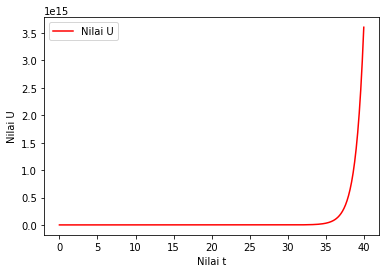

In [ ]:
method = ForwardEuler_v1(f, U0=0.1, T=40, N=400)
u, t = method.solve()
plt.plot(t, u,'r-',label='Nilai U')
plt.xlabel('Nilai t')
plt.ylabel('Nilai U')
plt.legend()
plt.show()

This class does essentially the same tasks as the ForwardEuler function above. The main advantage of the class implementation is the increased flexibility that comes with the advance method. Implementing a different numerical method typically only requires implementing a new version of this method, while all the other code can be left unchanged. We can also use a class to hold the right-hand side f(u, t), which is particularly convenient for functions with parameters. Consider for instance the model for logistic growth;

u'(t) = αu(t)   1 − u(t)   ,	u(0) = U0,	t ∈ [0, 40],

In [ ]:
class Logistic:
  def __init__(self, alpha, R, U0):
    self.alpha, self.R, self.U0 = alpha, float(R), U0
  def __call__(self, u, t): # f(u,t)
    return self.alpha*u*(1 - u/self.R)

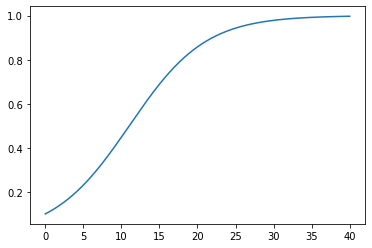

In [ ]:
problem = Logistic(0.2, 1, 0.1)
method = ForwardEuler_v1(problem,problem.U0,40,401)
u, t = method.solve()
plt.plot(t,u)
plt.show()

In [ ]:
class ForwardEuler_v2:
  def __init__(self, f):
    self.f = f
  def set_initial_condition(self,U0):
    self.U0 = float(U0)
  def solve(self, time_points):
    """Compute solution for array of time points"""
    self.t = np.asarray(time_points)
    N = len(self.t)
    self.u = np.zeros(N)
    self.u[0] = self.U0
    # Time loop
    for n in range(N-1):
      self.n = n
      self.u[n+1] = self.advance()
    return self.u, self.t
  def advance(self):
    """Advance the solution one time step."""
    # Create local variables to get rid of "self." in
    # the numerical formula
    u, f, n, t = self.u, self.f, self.n, self.t
    #dt is not necessarily constant:
    dt = t[n+1]-t[n]
    unew = u[n] + dt*f(u[n], t[n])
    return unew

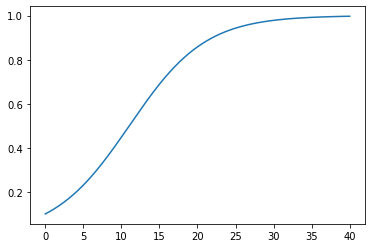

In [ ]:
problem = Logistic(0.2, 1, 0.1)
time = np.linspace(0,40,401)
method = ForwardEuler_v2(problem)
method.set_initial_condition(problem.U0)
u, t = method.solve(time)
plt.plot(t,u)

The use of these classes is nearly identical to the second version of the
FE class introduced earlier. Considering the same simple ODE used above;
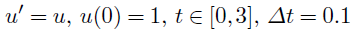
 the code looks like:





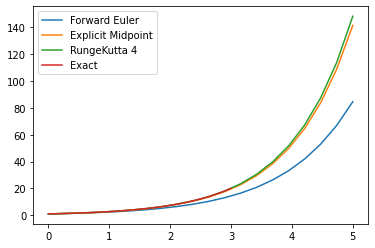

In [ ]:
#import ODESolver
from ODESolver import ForwardEuler, ExplicitMidpoint, RungeKutta4
def f(u, t):
  return u
time_points = np.linspace(0, 5, 20)
fe = ForwardEuler(f)
fe.set_initial_condition(U0=1)
u1, t1 = fe.solve(time_points)
plt.plot(t1, u1, label='Forward Euler')
em = ExplicitMidpoint(f)
em.set_initial_condition(U0=1)
u2, t2 = em.solve(time_points)
plt.plot(t2, u2, label='Explicit Midpoint')
rk4 = RungeKutta4(f)
rk4.set_initial_condition(U0=1)
u3, t3 = rk4.solve(time_points)
plt.plot(t3, u3, label='RungeKutta 4')
#plot the exact solution in the same plot
time_exact = np.linspace(0,3,301) #more points to improve the plot
plt.plot(time_exact,np.exp(time_exact),label='Exact')
plt.legend()
plt.show()

Example: ODE model for throwing a ball. To demonstrate the use of the extended ODESolver hierarchy, let us derive and solve a system of ODEs describing the trajectory of a ball. We first define  x(t), y(t) to be the position of the ball, vx and vy the velocity components, and ax, ay the acceleration components. From the definition of velocity and acceleration, we have vx = dx/dt, vy = dy/dt, ax = dvx/dt, and ay = dvy/dt. If we neglect air resistance there are no forces acting on the ball in the x-direction, so from Newton’s


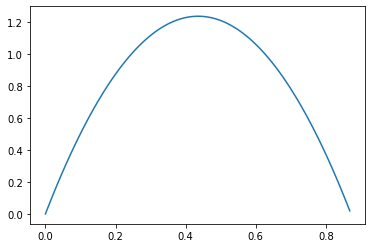

In [ ]:
#from ODESolver1 import ForwardEuler
import ODESolver1 as ODE
import numpy as np
def f(u, t):
    x, vx, y, vy = u
    g = 9.81
    return [vx, 0, vy, -g]
import matplotlib.pyplot as plt
# Initial condition, start at the origin:
x = 0; y = 0
# velocity magnitude and angle:
v0 = 5; theta = 80*np.pi/180
vx = v0*np.cos(theta); vy = v0*np.sin(theta)
U0 = [x, vx, y, vy]
#solver= ForwardEuler(f)
solver= ODE.RungeKutta4(f)
solver.set_initial_condition(U0)
time_points = np.linspace(0, 1.0, 101)
u, t = solver.solve(time_points)
# u is an array of [x,vx,y,vy] arrays, plot y vs x:
x = u[:,0]; y = u[:,2]
plt.plot(x, y)
plt.show()


No handles with labels found to put in legend.


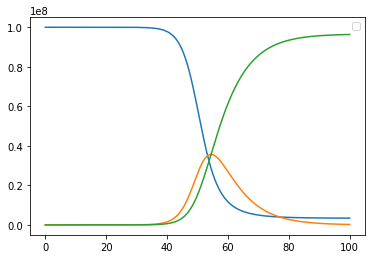

In [ ]:
from ODESolver1 import RungeKutta4
import numpy as np
import matplotlib.pyplot as plt
def SIR_model(u,t):
  beta = 0.5
  nu = 1/7.0
  S, I, R = u[0], u[1], u[2]
  N = S+I+R
  dS = -beta*S*I/N
  dI = beta*S*I/N - nu*I
  dR = nu*I
  return [dS,dI,dR]
S0 = 100000000
I0 = 1
R0 = 0
solver= RungeKutta4(SIR_model)
solver.set_initial_condition([S0,I0,R0])
time_points = np.linspace(0, 100, 501)
u, t = solver.solve(time_points)
S = u[:,0]; I = u[:,1]; R = u[:,2]
plt.plot(t,S,t,I,t,R)
plt.legend()
plt.show()

In [ ]:
class SIR:
  def __init__(self, beta, nu):
    self.beta = beta
    self.nu = nu
  def __call__(self,u,t):
    S, I, R = u[0], u[1], u[2]
    N = S+I+R
    dS = -self.beta*S*I/N
    dI = self.beta*S*I/N - self.nu*I
    dR = self.nu*I
    return [dS,dI,dR]

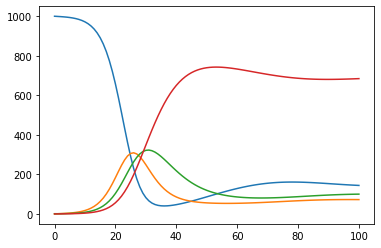

In [ ]:
from ODESolver1 import RungeKutta4
import numpy as np
import matplotlib.pyplot as plt
class SEIR:
  def __init__(self, beta, mu, nu, gamma):
    self.beta = beta
    self.mu = mu
    self.nu = nu
    self.gamma = gamma
  def __call__(self,u,t):
    S, E, I, R = u
    N = S+I+R+E
    dS = -self.beta*S*I/N + self.gamma*R
    dE = self.beta*S*I/N - self.mu*E
    dI = self.mu*E - self.nu*I
    dR = self.nu*I - self.gamma*R
    return [dS,dE,dI,dR]
S0 = 1000
E0 = 0
I0 = 1
R0 = 0
model = SEIR(beta=1.0, mu=1.0/5,nu=1.0/7,gamma=1.0/50)
solver= RungeKutta4(model)
solver.set_initial_condition([S0,E0,I0,R0])
time_points = np.linspace(0, 100, 101)
u, t = solver.solve(time_points)
S = u[:,0]; E = u[:,1]; I = u[:,2]; R = u[:,3]
plt.plot(t,S,t,E,t,I,t,R)
plt.show()